# Logistic Regression

In [61]:
# Se importan las librerias a usar
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing  import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV

## Acerca del conjunto de datos `ChurnData.csv`

Utilizaremos un conjunto de datos de telecomunicaciones para predecir la rotación de clientes. Este es un conjunto de datos histórico de clientes donde cada fila representa a un cliente. Los datos son relativamente fáciles de entender y es posible descubrir ideas que se pueden utilizar de inmediato. Normalmente, es menos costoso mantener a los clientes que adquirir nuevos, por lo que el enfoque de este análisis es predecir los clientes que permanecerán en la compañía.

### El conjunto de datos incluye información sobre:

Clientes que se fueron en el último mes: la columna se llama Churn
Servicios a los que se ha inscrito cada cliente: teléfono, líneas múltiples, internet, seguridad en línea, copia de seguridad en línea, protección de dispositivos, soporte técnico y transmisión de TV y películas
Información de la cuenta del cliente: cuánto tiempo ha sido cliente, contrato, método de pago, facturación sin papel, cargos mensuales y cargos totales
Información demográfica sobre los clientes: género, rango de edad y si tienen parejas y dependientes. [Dataset source](https://www.kaggle.com/datasets/prathamtripathi/drug-classification/data)

In [45]:
# Se importa el archivo
df = pd.read_csv('ChurnData.csv', delimiter=",")
# visualizamos el df
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


EDA

In [46]:
# Visualiza el total de clumnas
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [47]:
# Verificamos el tipo de dato en las columnas 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [48]:
# Contamos los valores duplicados
df.duplicated().value_counts()

False    200
Name: count, dtype: int64

In [49]:
# Contamos los valores nulos
df.isnull().sum()

tenure      0
age         0
address     0
income      0
ed          0
employ      0
equip       0
callcard    0
wireless    0
longmon     0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
longten     0
tollten     0
cardten     0
voice       0
pager       0
internet    0
callwait    0
confer      0
ebill       0
loglong     0
logtoll     0
lninc       0
custcat     0
churn       0
dtype: int64

Se identifica que en el dataset no hay valores duplicados y no hay valores nulos

In [50]:
# Selecionamos las columnas con las que vamos a trabajar
df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']]
# Cambia el tipo de dato a la columna churn
df['churn'] = df['churn'].astype('int')
df.head()

,tenure,age,address,income,ed,employ,equip,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0


In [29]:
# # Visualiza las relaciones entre las variables
# sns.pairplot(df.drop(columns='churn'))
# plt.show()

Con este par de gráficos podemos visualizar mejor la composición de nuestro dataset.

In [30]:
# Seleccionamos nuestras variables predictoras
X = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']].values
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [31]:
# Seleccionamos nuestra variable objetivo
y = df['churn'].values
y[0:5]

array([1, 1, 0, 0, 0])

Se pueden observar diferentes escalas en las variables, al estandarizar los datos, se centran alrededor de cero y tienen una desviación estándar de uno, lo que facilita la comparación y el análisis de las variables.

In [32]:
# Se estandarizan los datos
X_proc = StandardScaler().fit(X).transform(X)
X_proc[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

In [33]:
# # Se divide el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_proc, y, test_size=0.2, random_state=4)

In [62]:
# Define la cuadrícula de hiperparámetros a probar
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
              }

# Crea el modelo de regresión logística
log = LogisticRegression()

# Utiliza GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(log, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Muestra los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)



Mejores hiperparámetros: {'C': 0.01, 'solver': 'liblinear'}


c:\Users\Willc\OneDrive\Escritorio\William\PI2_siniestros_viales\pi2-env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Willc\OneDrive\Escritorio\William\PI2_siniestros_viales\pi2-env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Willc\OneDrive\Escritorio\William\PI2_siniestros_viales\pi2-env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Willc\OneDrive\Escritorio\William\PI2_siniestros_viales\pi2-env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Willc\OneDrive\Escritorio\William\PI2_siniestros_viales\pi2-env\Lib\site-packages\sklea

In [63]:
# Crea la regresión logística con los mejores hiperparametros y entrena el modelo
log = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
log


LogisticRegression(C=0.01, solver='liblinear')

In [54]:
# Predecir  para los datos de prueba
ypred = log.predict(X_test)
ypred[0:6]

array([0, 0, 0, 0, 0, 0])

In [55]:
# Muestra las probabilidades de las predicciones
ypred_prob = log.predict_proba(X_test)
ypred_prob

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161],
       [0.55386646, 0.44613354],
       [0.52237207, 0.47762793],
       [0.60514349, 0.39485651],
       [0.41069572, 0.58930428],
       [0.6333873 , 0.3666127 ],
       [0.58068791, 0.41931209],
       [0.62768628, 0.37231372],
       [0.47559883, 0.52440117],
       [0.4267593 , 0.5732407 ],
       [0.66172417, 0.33827583],
       [0.55092315, 0.44907685],
       [0.51749946, 0.48250054],
       [0.485743  , 0.514257  ],
       [0.49011451, 0.50988549],
       [0.52423349, 0.47576651],
       [0.61619519, 0.38380481],
       [0.52696302, 0.47303698],
       [0.63957168, 0.36042832],
       [0.52205164, 0.47794836],
       [0.50572852, 0.49427148],
       [0.70706202, 0.29293798],
       [0.55266286, 0.44733714],
       [0.52271594, 0.47728406],
       [0.51638863, 0.48361137],
       [0.71331391, 0.28668609],
       [0.

El jaccard_score se utiliza para medir la calidad de las predicciones del modelo. 

In [56]:
# Evalua el modelo con el jaccard_score
jaccard_score(y_test, ypred,pos_label=0)# pos_lebel indica que los valores 0 son los positivos

0.7058823529411765

Un resultado de jaccard_score de aproximadamente 0.706 indica que el modelo tiene un rendimiento relativamente bueno en la predicción de la clase positiva (etiqueta 0 en este caso) en comparación con la clase negativa.

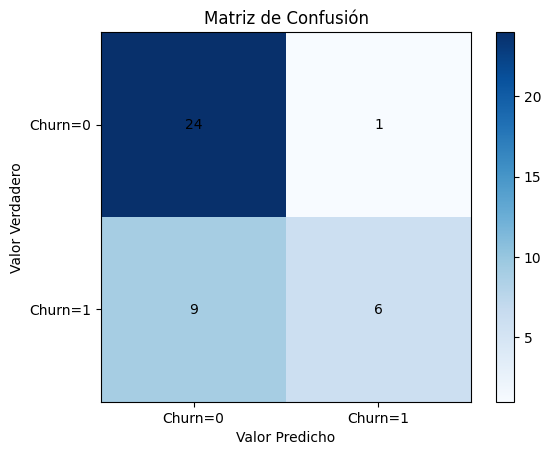

In [57]:
# Crear la matriz de confusión
cnf_matrix = confusion_matrix(y_test, ypred)
# Mostrar la matriz de confusión con valores
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)

# Añadir etiquetas a cada celda
for i in range(cnf_matrix.shape[0]):
    for j in range(cnf_matrix.shape[1]):
        plt.text(j, i, str(cnf_matrix[i, j]), horizontalalignment='center', verticalalignment='center')

plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['Churn=0', 'Churn=1'])
plt.yticks(tick_marks, ['Churn=0', 'Churn=1'])
plt.ylabel('Valor Verdadero')
plt.xlabel('Valor Predicho')
plt.show()

- Verdaderos positivos (TP): 24. Estos son los casos en los que el modelo predijo correctamente la clase positiva (1).
- Falsos positivos (FP): 1. Estos son los casos en los que el modelo predijo incorrectamente la clase positiva (1) cuando la verdadera clase era negativa (0).
- Falsos negativos (FN): 9. Estos son los casos en los que el modelo predijo incorrectamente la clase negativa (0) cuando la verdadera clase era positiva (1).
- Verdaderos negativos (TN): 6. Estos son los casos en los que el modelo predijo correctamente la clase negativa (0).

In [59]:
print (classification_report(y_test, ypred))


              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



In [60]:
# Evaluamos la precisión de las probabilidades pronosticadas por el modelo clasificador
log_loss(y_test, ypred_prob)

0.6017092478101185

- Precision: La precisión es la proporción de verdaderos positivos (TP) sobre todos los casos positivos predichos (TP + FP). En este caso, la precisión para la clase 0 es 0.73, lo que significa que el 73% de los casos predichos como clase 0 fueron realmente clase 0. Para la clase 1, la precisión es 0.86, lo que significa que el 86% de los casos predichos como clase 1 fueron realmente clase 1.
- Recall (Exhaustividad): La exhaustividad es la proporción de verdaderos positivos (TP) sobre todos los casos positivos reales (TP + FN). En este caso, la exhaustividad para la clase 0 es 0.96, lo que significa que el 96% de los casos de la clase 0 fueron identificados correctamente. Para la clase 1, la exhaustividad es 0.40, lo que significa que solo el 40% de los casos de la clase 1 fueron identificados correctamente.
- F1-score: El F1-score es la media armónica de precisión y exhaustividad. Es útil cuando hay un desequilibrio entre las clases. El F1-score es bajo si cualquiera de las dos métricas (precisión o exhaustividad) es baja. En este caso, el F1-score para la clase 0 es 0.83 y para la clase 1 es 0.55.
- Support: El soporte es el número de ocurrencias reales de cada clase en el conjunto de datos de prueba.
Accuracy: La precisión global del modelo, que es la proporción de predicciones correctas sobre el total de predicciones.
- Log Loss: El valor de log loss de 0.60 indica que el modelo tiene un rendimiento razonable en términos de la calibración de las probabilidades, aunque siempre se puede mejorar.

En conclusion el modelo tiene una precisión general del 75%, pero hay diferencias  en el rendimiento entre las dos clases, con la clase 0 teniendo un mejor rendimiento en términos de precisión, exhaustividad y F1-score que la clase 1.